In [1]:
import mne
from mne.preprocessing import read_ica
from mne import Epochs, pick_types

# Change the subject to make an epoch
subject = "P14"

# Load raw and ica from respective folder
raw = mne.io.read_raw("raw/"+ subject + "-raw.fif", preload=True)
ica = read_ica("ica/" + subject + "-ica.fif")

Opening raw data file raw/P14-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
    Range : 0 ... 2465433 =      0.000 ...  4815.299 secs
Ready.
Reading 0 ... 2465433  =      0.000 ...  4815.299 secs...
Reading ica/P14-ica.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
Now restoring ICA solution ...
Ready.


In [2]:
# Apply ica to raw object
ica.apply(raw.copy(), exclude=ica.exclude)

# Interpolate bad channels, set up highlow bandpass of 7Hz, 30Hz
print(raw.info["ch_names"])
if 'EXG5' in raw.info["ch_names"]:
    raw.drop_channels(["EXG5", "EXG6"])
raw.set_montage("biosemi64")
raw.filter(7.0, 30.0)
raw.interpolate_bads()

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'STI 014']
Removing projector <Projection | Average EEG reference, active : False, n_channels : 66>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    4.1s finished


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 62 sensor positions
Interpolating 2 sensors


Measurement date,"March 06, 2015 11:30:43 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 4 EOG, 1 Stimulus"
Bad channels,None
EOG channels,"EXG1, EXG2, EXG3, EXG4"
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,7.00 Hz
Lowpass,30.00 Hz


In [3]:
# Set up event, event dict for initiating epoch object 
events = mne.find_events(raw, stim_channel="STI 014")
event_dict = {
    'Chim Chim Cheree with lyrics' : 11,
    'Take Me Out To The Ballgame with lyrics' : 21,
    'Jingle Bells with lyrics' : 31,
    'Mary Had A Little Lamb with lyrics' : 41,
    'Chim Chim Cheree without lyrics' : 111,
    'Take Me Out To The Ballgame without lyrics' : 121,
    'Jingle Bells without lyrics' : 131,
    'Mary Had A Little Lamb without lyrics': 141,
    'Emperor Waltz': 211,
    'Harry Potter Theme' : 221,
    'Star Wars Theme': 231,
    'Eine kleine Nachtmusik': 241,
}

540 events found on stim channel STI 014
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1000 1111 2000 2001]


Not setting metadata
60 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 60 events and 2561 original time points ...
0 bad epochs dropped
<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 7.0 Hz
 lowpass: 30.0 Hz
 meas_date: 2015-03-06 11:30:43 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 512.0 Hz
>
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated


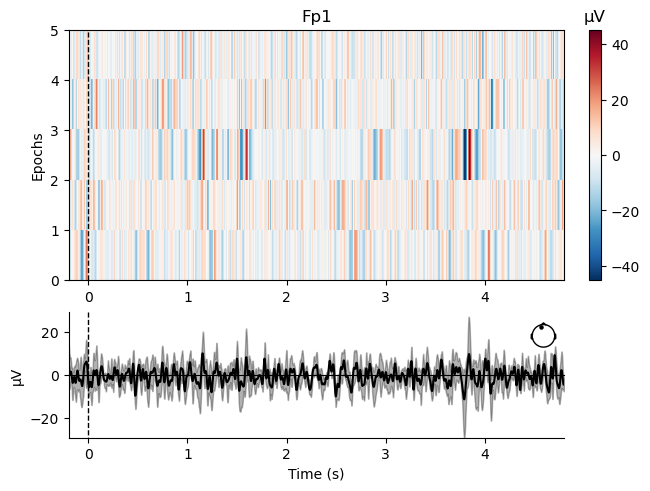

[<Figure size 640x480 with 4 Axes>]

In [4]:
picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Make Epochs object of t=-0.2 to t=4.8
epochs = Epochs(
    raw,
    events,
    event_id=event_dict,
    tmin=-0.2,
    tmax=4.8,
    proj=False,
    picks=picks,
    preload=True,
)

print(epochs.info)
epochs['Chim Chim Cheree with lyrics'].plot_image(picks=[0])

In [5]:
# Save epoch to epoch folder 
epochs.save("epoch/"+ subject + "-epo.fif")

In [6]:
del raw, epochs, ica